# Lista 5

## Kod 

### Importowanie bibliotek

In [178]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from PIL import Image
from IPython.display import display
from scipy.stats import shapiro,ttest_ind
from scipy.stats import t as tp

### Funkcje 

Generator liczb pseudolosowych 

In [126]:
class generator():
    def __init__(self,a=1664525,c=1013904223,m=2*32,seed=None):
        self.a = a
        self.c = c
        self.m = m
        if seed == None:
            seed = time.time()
        self.current = seed
        
    
    def random(self):
        self.current = (self.a*self.current + self.c)%self.m
        return self.current/self.m
    
    def normal(self):
        x1 = self.random()
        x2 = self.random()
        z1 = math.sqrt(-2*math.log(x1))*math.cos(2*math.pi*x2)
        return 0.5 + 0.5 * z1
        
        
        

Funkcja do obliczania statystyk opisowych 

In [127]:
def statystyki(data):
    mean = np.mean(data)
    median = np.median(data)
    mode = stats.mode(data)
    std = np.std(data)
    var = np.var(data)
    skew = stats.skew(data)
    kurtoza = stats.kurtosis(data,fisher=True)
    Q1, Q2, Q3 = np.percentile(data, [25, 50, 75])
    

    result = {
        'mean':mean,
        'median':median,
        'mode':mode,
        'std':std,
        'var':var,
        'skosnosc':skew,
        'kurtoza':kurtoza,
        'kwartyl_25': Q1,
        'kwartyl_50': Q2,
        'kwartyl_75': Q3
    }
    return result

Funkcja do generowania ciągów o długości n z generatora

In [128]:
def generator_ciagow(n):
    gen = generator()
    result = []
    for i in range(n):
        result.append(gen.normal())
    return result

Generowanie ciągów a i b

In [129]:
a = generator_ciagow(20)
b = generator_ciagow(100)

Ciągi a i b z listy 3

In [136]:
a2 = np.array([-0.06696181,  1.22929501,  0.12605877, -0.07129993,  0.85923473,
        1.44015968,  0.24618215,  1.29503517,  0.21804109,  0.92182873,
        0.83261584,  0.08875752, -0.11465233,  0.53400934,  0.37977839])
b2 = np.array([ 1.12653133,  0.2834511 ,  0.13268093,  0.85505971,  0.21541661,
        0.79952875,  0.67923513,  0.38143805,  1.19699549,  0.30560602,
        0.52415704,  0.78749958,  0.24336738,  0.49342602,  1.21814289,
        1.1450557 ,  0.87803847,  0.80106286,  0.03600593, -0.33892595,
        0.97143263,  0.6316542 ,  0.31323828,  0.49853277,  0.33757125,
        0.1814543 ,  0.99348971, -0.24072856, -0.20123598,  0.41705876,
        0.30510422,  0.29063702,  0.1317941 ,  0.57749834,  0.90563429,
        0.83172805,  0.73501458,  0.53814532,  0.34099723,  0.32455125,
        0.46234119,  0.6368717 ,  1.70809701,  0.30229907, -0.40548867,
        0.96788943, -0.089474  ,  0.9870014 ,  0.32664317,  1.2755905 ,
        0.45360146,  0.3937188 , -0.56365275,  0.37160436,  0.02694252,
       -0.02094619,  0.31215235,  1.59347161,  1.50530534,  1.04354158,
        0.2816571 ,  0.51611615,  0.45499287,  0.94431351,  0.64873172,
       -0.13598025,  0.25471736,  0.08050555,  0.52306382,  1.0165964 ,
        1.20993895,  0.66493658,  0.15379302,  1.21375752,  1.23425181,
        1.16399068,  0.6466094 ,  0.30518552, -0.310675  ,  1.32982741,
        0.39993773,  0.22723363,  0.4547559 ,  0.93027484,  0.78920975,
       -0.67231075,  0.53123184,  0.18586405,  0.79675346,  0.41411176,
        0.60879676,  0.43315281,  0.51122938,  1.11775606,  0.53107523,
        0.87940796, -0.29283406,  0.43100917,  0.47368487,  0.33174111,
        0.49969445,  0.42920511,  1.04988202,  1.02528699,  1.01835794,
        0.30117962, -0.58006437, -0.2972588 ,  0.36038991,  0.49889757,
        0.34700223,  0.2011089 ,  0.22604331, -0.02982527,  0.84414195,
        0.29547952,  0.31220025,  0.80044239,  0.18583515,  0.48376206])

Funkcja do generowania histogramów dwóch ciągów 

In [138]:
def histogram(a,b):

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    x = np.linspace(-1, 2, 1000)
    y = norm.pdf(x, 0.5, 0.5)
    axes[0].hist(a, bins=np.linspace(-1, 2, 13), density=True, color='skyblue', edgecolor='black')
    axes[0].plot(x, y, color='red', label='Funkcja gęstości')
    axes[0].set_title(f'Histogram dla próby o długości {len(a)}')
    axes[0].set_xlabel('Wartości')
    axes[0].set_ylabel('Gęstość')
    axes[0].set_xticks(np.arange(-1, 2.25, 0.25))
    axes[0].legend()

    axes[1].hist(b, bins=np.linspace(-1, 2, 13), alpha = 0.5,density=True, color='orange', edgecolor='black')
    axes[1].plot(x, y, color='red', label='Funkcja gęstości')
    axes[1].set_title(f'Histogram dla próby o długości {len(b)}')
    axes[1].set_xlabel('Wartości')
    axes[1].set_ylabel('Gęstość')
    axes[1].set_xticks(np.arange(-1, 2.25, 0.25))
    axes[0].legend()
    
    plt.tight_layout()
    plt.show()


Funkcja do obliczania statystyki testowej i wartości p testu t studenta

In [ ]:
def t_value(n,std,mean,h_value):
    t = (mean - h_value)/(std/math.sqrt(n))
    p = 2 * tp.sf(abs(t), n-1)
    return t,p

## Statystyka opisowa

### Dla ciągów z tej listy

Dla ciągu 20 elementowego

In [133]:
statystyki(a)

{'mean': np.float64(0.6418278728008924),
 'median': np.float64(0.6994564548366295),
 'mode': ModeResult(mode=np.float64(-0.33767887516391626), count=np.int64(1)),
 'std': np.float64(0.40218972686006366),
 'var': np.float64(0.16175657639177263),
 'skosnosc': np.float64(-0.26959822001481765),
 'kurtoza': np.float64(0.38447758596349946),
 'kwartyl_25': np.float64(0.3517447384250362),
 'kwartyl_50': np.float64(0.6994564548366295),
 'kwartyl_75': np.float64(0.9083837947804159)}

Dla ciągu 100 elementowego

In [134]:
statystyki(b)

{'mean': np.float64(0.5166927268121769),
 'median': np.float64(0.48918437871882403),
 'mode': ModeResult(mode=np.float64(0.32168707257742), count=np.int64(4)),
 'std': np.float64(0.4531003527505915),
 'var': np.float64(0.2052999296627105),
 'skosnosc': np.float64(-0.10208101123690094),
 'kurtoza': np.float64(-0.4363870379955803),
 'kwartyl_25': np.float64(0.3121377835739471),
 'kwartyl_50': np.float64(0.48918437871882403),
 'kwartyl_75': np.float64(0.8968703030448588)}

### Dla ciągów z listy 3

Ciąg a2

{'mean': np.float64(0.37270088767939974),  
 'median': np.float64(0.4690012141639791),  
 'mode': 'Brak dominanty',  
 'std': np.float64(0.4961520896531639),  
 'var': np.float64(0.24616689606720119),  
 'skosnosc': np.float64(-0.20426291624021103),  
 'kurtoza': np.float64(-0.8783732525114418),  
 'kwartyl_25': np.float64(-0.05258073034610539),  
 'kwartyl_50': np.float64(0.4690012141639791),  
 'kwartyl_75': np.float64(0.6586003646733949)}  


Ciąg b2

{'mean': np.float64(0.5027463169660095),  
 'median': np.float64(0.48527618421723695),  
 'mode': 'Brak dominanty',  
 'std': np.float64(0.4741995924215169),  
 'var': np.float64(0.22486525345273273),  
 'skosnosc': np.float64(0.01840438662320666),  
 'kurtoza': np.float64(-0.02266487385247906),  
 'kwartyl_25': np.float64(0.178488573478762),  
 'kwartyl_50': np.float64(0.48527618421723695),  
 'kwartyl_75': np.float64(0.8161124900795171)}  

## Histogramy

Histogramy dla ciągów z tej listy

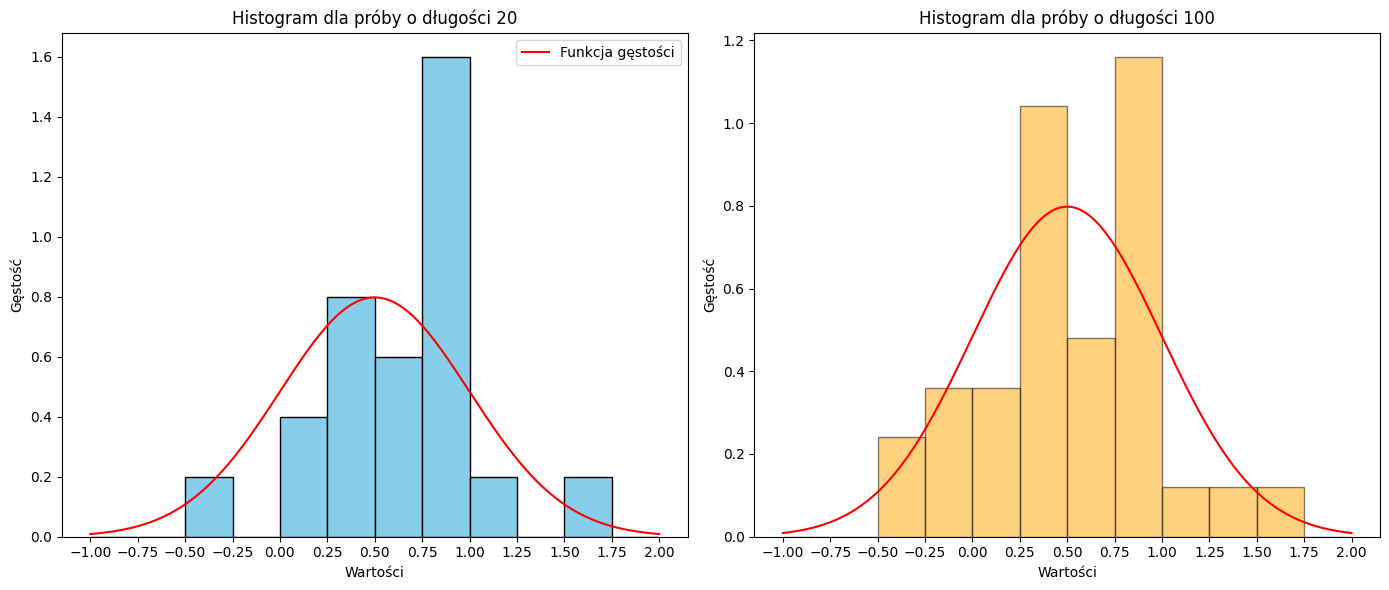

In [139]:
histogram(a,b)

Histogramy dla ciąagów z listy 3

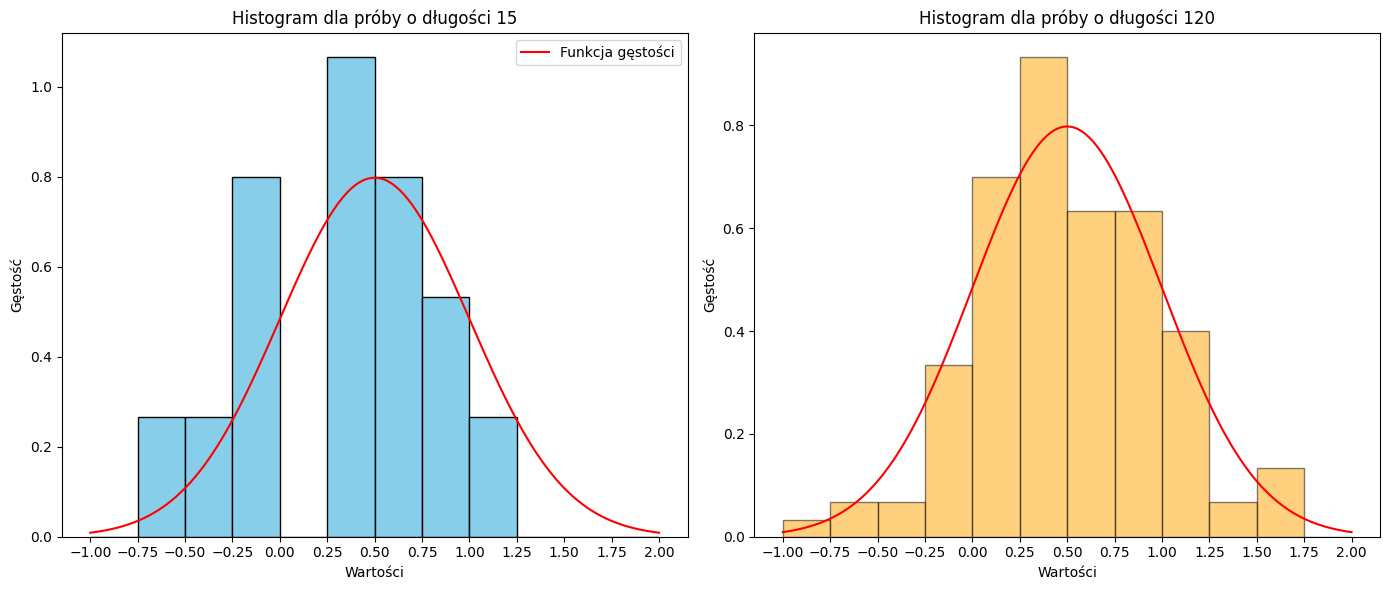

In [141]:
img = Image.open('HistogramsL3.png')
display(img)

## Testy statystyczne

### Test : Rozkład prób jest zgodny z rozkładem normalnym

Poziom ufności : 0.05  
H0 : Rozkład prób jest zgodny z rozkładem normalnym  
HA : Rozkład prób nie jest zgodny z rozkładem normalnym

#### Ciągi z tej listy

##### Ciąg 20 elementowy

Obliczanie statystyki testowej i wartości p :

In [146]:
stat20, p_value20 = shapiro(a)

In [152]:
print(f"Statystyka testowa = {stat20}, wartość p = {p_value20}")

Statystyka testowa = 0.9654815199601191, wartość p = 0.6580561328110854


Wyniki : 

In [150]:
if p_value20 < 0.05:
    print("Rozkład próby 20 elementowej nie jest zgodny z rozkładem normalnym")
else:
    print("Rozkład próby 20 elementowej jest zgodny z rozkładem normalnym")

Rozkład próby 20 elementowej jest zgodny z rozkładem normalnym


##### Ciąg 100 elementowy 

In [148]:
stat100, p_value100 = shapiro(a)

In [149]:
print(f"Statystyka testowa = {stat100}, wartość p = {p_value100}")

Statystyka testowa = 0.9654815199601191, wartość p = 0.6580561328110854


Wyniki : 

In [151]:
if p_value20 < 0.05:
    print("Rozkład próby 100 elementowej nie jest zgodny z rozkładem normalnym")
else:
    print("Rozkład próby 100 elementowej jest zgodny z rozkładem normalnym")

Rozkład próby 100 elementowej jest zgodny z rozkładem normalnym


#### Ciągi z listy 3

##### Ciąg 15 elementowy

In [156]:
stat15_2, p_value15_2 = shapiro(a2)

In [157]:
print(f"Statystyka testowa = {stat15_2}, wartość p = {p_value15_2}")

Statystyka testowa = 0.9125674903142219, wartość p = 0.14825754463816487


Wyniki : 

In [158]:
if p_value20 < 0.05:
    print("Rozkład próby 15 elementowej z drugiej listy nie jest zgodny z rozkładem normalnym")
else:
    print("Rozkład próby 15 elementowej z drugiej listy jest zgodny z rozkładem normalnym")

Rozkład próby 15 elementowej z drugiej listy jest zgodny z rozkładem normalnym


Obliczanie statystyki testowej i wartości p :

##### Ciąg 120 elementowy

In [160]:
stat120_2, p_value120_2 = shapiro(b2)

In [161]:
print(f"Statystyka testowa = {stat120_2}, wartość p = {p_value120_2}")

Statystyka testowa = 0.985495549650911, wartość p = 0.2275362199915406


Wyniki : 

In [162]:
if p_value20 < 0.05:
    print("Rozkład próby 120 elementowej z drugiej listy nie jest zgodny z rozkładem normalnym")
else:
    print("Rozkład próby 120 elementowej z drugiej listy jest zgodny z rozkładem normalnym")

Rozkład próby 120 elementowej z drugiej listy jest zgodny z rozkładem normalnym


### Test : Srednie z prób są równe 0.5

Poziom ufności : 0.05  
H0 : Rozkład prób jest równy 0.5  
HA : Rozkład prób nie jest równy 0.5

Zastosuję test studenta, gdyż test shapiro wilka dla poziomu ufności 0.05  
 nie odrzucił hipotezy, że rozkłady prób są zgodne z normalnym,   
 jednocześnie pomimo różnej liczności prób, jest spełniony warunek homoskedastyczności,    
  ponieważ wartości wariancji niewiele się różnią. 

#### Ciąg 20 elementowy

Obliczanie statystyki testowej : 

In [171]:
aw = t_value(20,statystyki(a)['std'],statystyki(a)['mean'],0.5)

In [172]:
print(f"Statystyka testowa = {aw[0]}, wartość p = {aw[1]}")

Statystyka testowa = 1.5770505485702384, wartość p = 0.13128835994899063


Wyniki : 

In [173]:
if aw[1] < 0.05:
    print("Odrzucenie H0,śrenia z próby 20 elementowej nie jest równa 0.5")
else:
    print("Nie ma podstaw do odrzucenia H0, śrenia z próby 20 elementowej jest równa 0.5")

Nie ma podstaw do odrzucenia H0, śrenia z próby 20 elementowej jest równa 0.5


#### Ciąg 100 elementowy

Obliczanie statystyki testowej :

In [175]:
bw = t_value(20,statystyki(b)['std'],statystyki(b)['mean'],0.5)

In [176]:
print(f"Statystyka testowa = {bw[0]}, wartość p = {bw[1]}")

Statystyka testowa = 0.1647585205143597, wartość p = 0.8708742876646434


Wyniki : 

In [177]:
if aw[1] < 0.05:
    print("Odrzucenie H0,śrenia z próby 100 elementowej nie jest równa 0.5")
else:
    print("Nie ma podstaw do odrzucenia H0, śrenia z próby 100 elementowej jest równa 0.5")

Nie ma podstaw do odrzucenia H0, śrenia z próby 100 elementowej jest równa 0.5


### Test : Średnie z prób z dwóch list są równe

Poziom ufności : 0.05  
H0 : Średnie z prób są równe  
HA : Średnie z prób nie są równe

Zastosuje test dwóch średnich dla niezależnych prób,   
ponieważ z test shapiro wilka, na poziomie ufności 0.05   
nie odrzucił hipotezy o zgodności rozkładu prób z rozkładem normalnym.  
 Jednocześnie wartości wariancji sa podobne pomimo różnej liczności prób. 

#### Dla ciągów 15 elementowego z listy 3 i 20 elementowego z tej listy

Obliczenie statystyki testowej i wartości p :

In [179]:
stat_srednie_1, p_srednie_1 = ttest_ind(a,a2)

In [181]:
print(f"Statystyka testowa = {stat_srednie_1}, wartość p = {p_srednie_1}")

Statystyka testowa = 0.7150966394296809, wartość p = 0.4795782970330701


Wyniki : 

In [182]:
if p_srednie_1 < 0.05:
    print("Odrzucamy hipoteze zerową, średnie próby 15 elementowej z listy 3 i 20 elementowej z tej listy nie są równe")
else: 
    print("Nie ma podstaw do odrzucenia hipotezy zerowej, średnie próby 15 elementowej z listy 3 i 20 elementowej z tej listy są równe")

Nie ma podstaw do odrzucenia hipotezy zerowej, średnie próby 15 elementowej z listy 3 i 20 elementowej z tej listy są równe


#### Dla ciągów 120 elementowego z listy 3 i 100 elementowego z tej listy

Obliczenie statystyki testowej i wartości p : 

In [183]:
stat_srednie_2, p_srednie_2 = ttest_ind(a,a2)

In [184]:
print(f"Statystyka testowa = {stat_srednie_2}, wartość p = {p_srednie_2}")

Statystyka testowa = 0.7150966394296809, wartość p = 0.4795782970330701


Wyniki : 

In [185]:
if p_srednie_2 < 0.05:
    print("Odrzucamy hipoteze zerową, średnie próby 120 elementowej z listy 3 i 100 elementowej z tej listy nie są równe")
else: 
    print("Nie ma podstaw do odrzucenia hipotezy zerowej, średnie próby 120 elementowej z listy 3 i 100 elementowej z tej listy są równe")

Nie ma podstaw do odrzucenia hipotezy zerowej, średnie próby 120 elementowej z listy 3 i 100 elementowej z tej listy są równe


## Wnioski

Statystyki opisowe dla ciągów z tej listy oraz ciągów z listy 3 mają podobne wartości.     
Histogramy dla ciągów z listy 3 lepiej dopasowują się do funkcji gęstości rozkładu normalnego.     
Test shapiro wilka dla wszystkich prób, na poziomie istotności 0.05 nie odrzucił hipotezy,    
że rozkład tych prób jest zgodny z rozkładem normalnym. Test t studenta również na poziomie    
istotności 0.05 nie odrzucił hipotezy, że średnia prób z tej listy jest równa 0.5.   
Test dwóch średnich dla niezależnych prób na poziomie istotności 0.05 nie odrzucił hipotezy,    
że średnie z prób 15 elementowej z listy 3 oraz 20 elementowej z tej listy są równe.   
Test dwóch średnich dla niezależnych prób na poziomie istotności 0.05 nie odrzucił hipotezy,    
że średnie z prób 120 elementowej z listy 3 oraz 100 elementowej z tej listy są równe.   